In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics
import tensorflow as tf
print(tf.__version__)
import tf_agents
import tensorflow_probability as tfp
print(tfp.__version__)
import math
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
from matplotlib import pyplot


2.9.0-dev20211224
0.16.0-dev20211226


In [3]:
# load dataset info, index by image ID:
dataset_masterfile = pd.read_csv('ImageCLEF2013PlantTask/info/ImageCLEFF2013PlantTaskMasterFileFinal.csv',delimiter=';',index_col='ImageID')

# load train & test dataset paths
train_paths = pd.read_csv('ImageCLEF2013PlantTask/info/training_path_list.csv')
test_paths = pd.read_csv('ImageCLEF2013PlantTask/info/test_path_list.csv')

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
dataset_masterfile.Content[32725]

'Leaf'

In [20]:
dataset_masterfile.Content

ImageID
32725    Leaf
23298    Leaf
21862    Leaf
5205     Leaf
8835     Leaf
         ... 
136      Leaf
1388     Leaf
23316    Leaf
24878    Leaf
13500    Leaf
Name: Content, Length: 26077, dtype: object

In [20]:
train_paths.Path[0]

'train/0/32725.jpg'

In [4]:
dataset_intern_dist = [None] * 250 # 250 classes with a dict of 6 image types (dict of lists) for every class
for i in range(250):
  dataset_intern_dist[i] = {
    'NaturalLeaf': [],
    'SheetLeaf': [],    
    'Flower': [],
    'Entire': [],
    'Stem': [],
    'Fruit': []
  }

for i in range(len(train_paths.Path)):
  split = train_paths.Path[i].split('/')
  class_id = int(split[1])
  image_id = int(split[2].replace('.jpg',''))
  content = dataset_masterfile.Content[int(image_id)] # get content
  if content == 'Leaf':
      if dataset_masterfile.Type[int(image_id)] == 'SheetAsBackground':
        dataset_intern_dist[class_id]['SheetLeaf'].append(image_id)
      else:
        dataset_intern_dist[class_id]['NaturalLeaf'].append(image_id)
  else:
    dataset_intern_dist[class_id][content].append(image_id)

train_dataset_intern_dist = dataset_intern_dist

dataset_intern_dist = [None] * 250 # 250 classes with a dict of 6 image types (dict of lists) for every class
for i in range(250):
  dataset_intern_dist[i] = {
    'NaturalLeaf': [],
    'SheetLeaf': [],    
    'Flower': [],
    'Entire': [],
    'Stem': [],
    'Fruit': []
  }

for i in range(len(test_paths.Path)):
  split = test_paths.Path[i].split('/')
  class_id = int(split[1])
  image_id = int(split[2].replace('.jpg',''))
  content = dataset_masterfile.Content[int(image_id)] # get content
  if content == 'Leaf':
      if dataset_masterfile.Type[int(image_id)] == 'SheetAsBackground':
        dataset_intern_dist[class_id]['SheetLeaf'].append(image_id)
      else:
        dataset_intern_dist[class_id]['NaturalLeaf'].append(image_id)
  else:
    dataset_intern_dist[class_id][content].append(image_id)    
test_dataset_intern_dist = dataset_intern_dist    

In [21]:
train_dataset_intern_dist = dataset_intern_dist

In [5]:
test_dataset_intern_dist

[{'NaturalLeaf': [17529,
   3454,
   24647,
   20390,
   24103,
   24885,
   5443,
   10122,
   8260,
   19086,
   24500],
  'SheetLeaf': [16827, 8602, 678, 23397],
  'Flower': [9497, 7863],
  'Entire': [],
  'Stem': [5424],
  'Fruit': [25436, 5035, 9545, 10741, 21957]},
 {'NaturalLeaf': [2809, 10113, 24426, 13169, 15393],
  'SheetLeaf': [3688,
   20011,
   25737,
   19740,
   24549,
   14468,
   22587,
   11647,
   4611,
   24413,
   11944,
   23925,
   18043,
   25862,
   9109,
   20430,
   1719],
  'Flower': [15360, 15358, 24451],
  'Entire': [23839, 7172, 12736, 24429],
  'Stem': [11836, 15987, 8709, 17875],
  'Fruit': [14595]},
 {'NaturalLeaf': [22809, 9391, 7998, 26095],
  'SheetLeaf': [7941,
   21066,
   3081,
   9232,
   22324,
   13418,
   20805,
   11570,
   23112,
   8307,
   9141,
   987,
   10890,
   11184,
   25084,
   1306,
   9950,
   17172,
   16333,
   15425,
   22101,
   6151,
   555,
   22306,
   24929,
   18432,
   7867,
   14836,
   11364,
   7635,
   8101,
   148

In [6]:
train_dataset_intern_dist

[{'NaturalLeaf': [34891,
   14115,
   16554,
   2663,
   35842,
   12280,
   5875,
   24726,
   14443,
   17918,
   30335,
   25701,
   34330,
   14170,
   18382,
   28320,
   15072,
   24273,
   34598,
   2860,
   9492,
   31608,
   28794,
   338,
   1832,
   2900,
   1125,
   22626,
   31881,
   34494,
   5022,
   18636,
   25776,
   16902,
   26294,
   7582,
   28530,
   19696,
   4652,
   12765,
   8847,
   17771,
   3204,
   10435,
   4680,
   20147,
   8160,
   13521,
   28430,
   21438,
   18033,
   15708,
   3785,
   473,
   83,
   28786,
   20786,
   22589,
   4218,
   15467,
   16073,
   7244,
   26895,
   24093,
   461,
   10728,
   487,
   2718,
   17945,
   6971,
   14650,
   5932,
   25456,
   20141,
   22429,
   25950,
   7237,
   28520,
   17372,
   13872,
   10740,
   13151,
   13359,
   4952,
   21390,
   29081],
  'SheetLeaf': [32725,
   33254,
   28306,
   29828,
   30882,
   29048,
   9340,
   6021,
   2737,
   1900,
   8657,
   1112,
   27138,
   24990,
   25748,


In [8]:
sum = 0
for i in range(len(train_dataset_intern_dist)):
  for key in train_dataset_intern_dist[i].keys():
    sum = sum + len(train_dataset_intern_dist[i][key])
print('Train dataset len check: ', sum)

sum = 0
for i in range(len(test_dataset_intern_dist)):
  for key in test_dataset_intern_dist[i].keys():
    sum = sum + len(test_dataset_intern_dist[i][key])
print('Test dataset len check: ', sum)

Train dataset len check:  20985
Test dataset len check:  5092


In [29]:
len(train_dataset_intern_dist[0]['Entire'])

5

In [9]:
''' 
Returns the number of samples in a class for a given subcategory (image type)
for a given distribution.
Categories: 
- 'NaturalLeaf'
- 'SheetLeaf'
- 'Flower'
- 'Entire'
- 'Stem'
- 'Fruit'
'''
def count_samples_in_distribution(class_id, subcategory, data_dist):
  class_dist = data_dist[class_id]
  return len(class_dist[subcategory])


In [10]:
''' 
  Compute subclass frequency for every class for train & test data distribution.
'''
train_leaf_class_freq = [None] * 250
train_sheet_leaf_class_freq = [None] * 250
train_flower_class_freq = [None] * 250
train_fruit_class_freq = [None] * 250
train_entire_class_freq = [None] * 250
train_stem_class_freq = [None] * 250

test_leaf_class_freq = [None] * 250
test_sheet_leaf_class_freq = [None] * 250
test_flower_class_freq = [None] * 250
test_fruit_class_freq = [None] * 250
test_entire_class_freq = [None] * 250
test_stem_class_freq = [None] * 250

mix_leaf_class_freq = [None] * 250
mix_sheet_leaf_class_freq = [None] * 250
mix_flower_class_freq = [None] * 250
mix_fruit_class_freq = [None] * 250
mix_entire_class_freq = [None] * 250
mix_stem_class_freq = [None] * 250

for i in range(250):
  train_leaf_class_freq[i] = count_samples_in_distribution(i, 'NaturalLeaf', train_dataset_intern_dist)
  train_sheet_leaf_class_freq[i] = count_samples_in_distribution(i, 'SheetLeaf', train_dataset_intern_dist)
  train_flower_class_freq[i] = count_samples_in_distribution(i, 'Flower', train_dataset_intern_dist)
  train_fruit_class_freq[i] = count_samples_in_distribution(i, 'Fruit', train_dataset_intern_dist)
  train_entire_class_freq[i] = count_samples_in_distribution(i, 'Entire', train_dataset_intern_dist)
  train_stem_class_freq[i] = count_samples_in_distribution(i, 'Stem', train_dataset_intern_dist)

  test_leaf_class_freq[i] = count_samples_in_distribution(i, 'NaturalLeaf', test_dataset_intern_dist)
  test_sheet_leaf_class_freq[i] = count_samples_in_distribution(i, 'SheetLeaf', test_dataset_intern_dist)
  test_flower_class_freq[i] = count_samples_in_distribution(i, 'Flower', test_dataset_intern_dist)
  test_fruit_class_freq[i] = count_samples_in_distribution(i, 'Fruit', test_dataset_intern_dist)
  test_entire_class_freq[i] = count_samples_in_distribution(i, 'Entire', test_dataset_intern_dist)
  test_stem_class_freq[i] = count_samples_in_distribution(i, 'Stem', test_dataset_intern_dist)

for i in range(250):
  mix_leaf_class_freq[i] = train_leaf_class_freq[i] + test_leaf_class_freq[i]
  mix_sheet_leaf_class_freq[i] = train_sheet_leaf_class_freq[i] + test_sheet_leaf_class_freq[i]
  mix_flower_class_freq[i] = train_flower_class_freq[i] + test_flower_class_freq[i]
  mix_fruit_class_freq[i] = train_fruit_class_freq[i] + test_fruit_class_freq[i] 
  mix_entire_class_freq[i] = train_entire_class_freq[i] + test_entire_class_freq[i]
  mix_stem_class_freq[i] = train_stem_class_freq[i] + test_stem_class_freq[i]
  
train_subdist = [train_leaf_class_freq, train_sheet_leaf_class_freq, train_flower_class_freq, train_fruit_class_freq, train_entire_class_freq, train_stem_class_freq]
test_subdist = [test_leaf_class_freq, test_sheet_leaf_class_freq, test_flower_class_freq, test_fruit_class_freq, test_entire_class_freq, test_stem_class_freq]  
mix_subdist = [mix_leaf_class_freq, mix_sheet_leaf_class_freq, mix_flower_class_freq, mix_fruit_class_freq, mix_entire_class_freq, mix_stem_class_freq]

In [11]:
dataset_intern_probs_train[0] # Laplace smoothed

NameError: name 'dataset_intern_probs_train' is not defined

In [31]:
# Make it a Probability distribution.
dataset_intern_probs_train = [None] * 250 # 250 classes with a dict of 6 image types (dict of lists) for every class
for i in range(250):
  dataset_intern_probs_train[i] = {
    'NaturalLeaf': 0,
    'SheetLeaf': 0,    
    'Flower': 0,
    'Entire': 0,
    'Stem': 0,
    'Fruit': 0
  }

dataset_intern_probs_test = [None] * 250 # 250 classes with a dict of 6 image types (dict of lists) for every class
for i in range(250):
  dataset_intern_probs_test[i] = {
    'NaturalLeaf': 0,
    'SheetLeaf': 0,    
    'Flower': 0,
    'Entire': 0,
    'Stem': 0,
    'Fruit': 0
  }
  
dataset_intern_probs_mix = [None] * 250 # 250 classes with a dict of 6 image types (dict of lists) for every class
for i in range(250):
  dataset_intern_probs_mix[i] = {
    'NaturalLeaf': 0,
    'SheetLeaf': 0,    
    'Flower': 0,
    'Entire': 0,
    'Stem': 0,
    'Fruit': 0
  }

k = 1 # For Laplace Smoothing
class_lenghtses = list()
for i in range(250):
  # Compute class lenght (total no. samples)
  class_length = train_leaf_class_freq[i] + train_sheet_leaf_class_freq[i] + train_flower_class_freq[i] + train_fruit_class_freq[i] + train_entire_class_freq[i] + train_stem_class_freq[i]
  class_lenghtses.append(class_length)
  # Compute probabilities (Train)
  dataset_intern_probs_train[i]['NaturalLeaf'] = (train_leaf_class_freq[i] + k) / (class_length + 6 * k) 
  dataset_intern_probs_train[i]['SheetLeaf'] = (train_sheet_leaf_class_freq[i] + k) / (class_length + 6 * k)
  dataset_intern_probs_train[i]['Flower'] = (train_flower_class_freq[i] + k) / (class_length + 6 * k) 
  dataset_intern_probs_train[i]['Fruit'] = (train_fruit_class_freq[i] + k)  / (class_length + 6 * k) 
  dataset_intern_probs_train[i]['Entire'] = (train_entire_class_freq[i] + k)  / (class_length + 6 * k)
  dataset_intern_probs_train[i]['Stem'] = (train_stem_class_freq[i] + k)  / (class_length + 6 * k)

  # Compute class lenght (total no. samples)
  class_length = test_leaf_class_freq[i] + test_sheet_leaf_class_freq[i] + test_flower_class_freq[i] + test_fruit_class_freq[i] + test_entire_class_freq[i] + test_stem_class_freq[i]

  # Compute probabilities (Test)
  dataset_intern_probs_test[i]['NaturalLeaf'] = (test_leaf_class_freq[i] + k) / (class_length + 6 * k)
  dataset_intern_probs_test[i]['SheetLeaf'] = (test_sheet_leaf_class_freq[i] + k) / (class_length + 6 * k)
  dataset_intern_probs_test[i]['Flower'] = (test_flower_class_freq[i] + k) / (class_length + 6 * k) 
  dataset_intern_probs_test[i]['Fruit'] = (test_fruit_class_freq[i] + k)  / (class_length + 6 * k) 
  dataset_intern_probs_test[i]['Entire'] = (test_entire_class_freq[i] + k)  / (class_length + 6 * k)
  dataset_intern_probs_test[i]['Stem'] = (test_stem_class_freq[i] + k)  / (class_length + 6 * k)
  
  # Compute class lenght (total no. samples)
  class_length = mix_leaf_class_freq[i] + mix_sheet_leaf_class_freq[i] + mix_flower_class_freq[i] + mix_fruit_class_freq[i] + mix_entire_class_freq[i] + mix_stem_class_freq[i]
  
  # Compute probabilities (Mix = Train + Test)
  dataset_intern_probs_mix[i]['NaturalLeaf'] = 1/2 * (mix_leaf_class_freq[i] + k) / (class_length + 6 * k)
  dataset_intern_probs_mix[i]['SheetLeaf'] = 1/2 * (mix_sheet_leaf_class_freq[i] + k) / (class_length + 6 * k)
  dataset_intern_probs_mix[i]['Flower'] = 1/2 * (mix_flower_class_freq[i] + k) / (class_length + 6 * k) 
  dataset_intern_probs_mix[i]['Fruit'] = 1/2 * (mix_fruit_class_freq[i] + k)  / (class_length + 6 * k)
  dataset_intern_probs_mix[i]['Entire'] = 1/2 * (mix_entire_class_freq[i] + k)  / (class_length + 6 * k)
  dataset_intern_probs_mix[i]['Stem'] = 1/2 * (mix_stem_class_freq[i] + k)  / (class_length + 6 * k)
  

In [34]:
a = 0 
for i in range(len(class_lenghtses)):
  if class_lenghtses[i] <= 100:
    a += 1
a

176

In [14]:
dataset_intern_probs_test[0] # Original Test dist

{'NaturalLeaf': 0.41379310344827586,
 'SheetLeaf': 0.1724137931034483,
 'Flower': 0.10344827586206896,
 'Entire': 0.034482758620689655,
 'Stem': 0.06896551724137931,
 'Fruit': 0.20689655172413793}

In [15]:
dataset_intern_probs_test[0] # Laplace smoothed

{'NaturalLeaf': 0.41379310344827586,
 'SheetLeaf': 0.1724137931034483,
 'Flower': 0.10344827586206896,
 'Entire': 0.034482758620689655,
 'Stem': 0.06896551724137931,
 'Fruit': 0.20689655172413793}

In [5]:
def JS_divergence(P,Q):
  M = {
    'NaturalLeaf': 0,
    'SheetLeaf': 0,    
    'Flower': 0,
    'Entire': 0,
    'Stem': 0,
    'Fruit': 0
  }
  for x in M:
    M[x] = 1/2 * (P[x]+Q[x])  
  return 1/2 * (kl_divergence(P,M) + kl_divergence(Q,M))

# KL Divergence:
def kl_divergence(P,Q):
  total = 0
  for x in P:
    kl = P[x] * np.log(P[x]/Q[x])
    total = total + kl
  return total

In [288]:
js_per_class = [None] * 250
for i in range(250):
  Q = dataset_intern_probs_train[i]
  P = dataset_intern_probs_test[i]
  js_per_class[i] = math.sqrt(JS_divergence(P,Q)) # Sqrt for obtaining metric

In [15]:
null_labels = [24,80,243,244,245,246,247,248,249]
label_list = list(range(250))
for i in range(len(null_labels)):
  label_list.pop(null_labels[i]-i)

In [61]:
dataset_intern_probs_train[0]

{'NaturalLeaf': 0.2806451612903226,
 'SheetLeaf': 0.34838709677419355,
 'Flower': 0.2064516129032258,
 'Entire': 0.01935483870967742,
 'Stem': 0.01935483870967742,
 'Fruit': 0.12580645161290321}

In [19]:
train_entropies = [] # Compute the entropy with respect to every class.
for i in label_list:
  entropy = 0
  dist = dataset_intern_probs_train[i] 
  for x in dist:
    entropy = entropy + (dist[x] * np.log(1/dist[x]))
  train_entropies.append(entropy)

In [20]:
# Metric: entropy
normalized_train_entropies = [None] * len(label_list) 
  
# Normalize:
index = np.argmin(train_entropies)
min_val = train_entropies[index]
index = np.argmax(train_entropies)
max_val = train_entropies[index]
for i in range(len(label_list)): # From 0 to 241
  normalized_train_entropies[i] = (train_entropies[i] - min_val)/(max_val - min_val)

In [75]:
train_entropies

[1.5064669787056646,
 1.3781818411804465,
 1.438226132555899,
 1.5232681052825625,
 0.95170802957797,
 1.3438405441104755,
 1.193384454370252,
 1.2683667262246596,
 1.4118195019908926,
 1.478103274628999,
 1.4468092147861777,
 1.4754500756965794,
 1.3593046840617287,
 1.4285507165223323,
 1.5335826793010268,
 1.2978444288225093,
 1.489851193527552,
 1.614036365447707,
 1.6085440959538606,
 1.2338141306356176,
 1.5398124209833635,
 1.1395911769822027,
 1.6552142914500407,
 1.6188239138970244,
 1.5378237324178925,
 1.3329238801967664,
 1.3579596025791423,
 1.5770770252482544,
 1.3654485471771451,
 1.392822195663224,
 1.4093190262735353,
 1.525324495568934,
 1.6260544608024217,
 1.598483097205021,
 1.413430213312841,
 1.6399668164938552,
 1.3148328972700178,
 1.6084425148164452,
 1.391817566498445,
 1.0282831265284245,
 1.4961551899199872,
 1.4107676636390127,
 1.463890311918995,
 1.3122656422914019,
 1.2982196567614035,
 1.630314853986633,
 1.288732560393324,
 1.580873927810376,
 1.52012

In [16]:
print(' - Classification Report:')
prediction_file = pd.read_csv('predictions_crop_and_translate.csv', delimiter=';')
y_true = prediction_file.y_true
print(cr(y_true, prediction_file.y_pred, labels=label_list,output_dict=False))
crop_trans_creport = cr(y_true, prediction_file.y_pred, labels=label_list, output_dict=True)

 - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.86      0.56      0.68        34
           2       0.37      0.76      0.49       104
           3       0.12      0.31      0.17        32
           4       0.17      0.45      0.25        20
           5       0.38      0.78      0.51        60
           6       0.32      0.70      0.44        50
           7       0.32      0.68      0.43        41
           8       0.77      0.69      0.73        29
           9       0.77      0.26      0.39       144
          10       0.52      0.61      0.56        18
          11       0.49      0.77      0.60       125
          12       0.46      0.52      0.49        52
          13       0.10      0.17      0.12         6
          14       0.20      0.20      0.20         5
          15       0.71      0.54      0.61        72
          16       0.49      0.77      0.60        35
 

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
print(' - Classification Report:')
prediction_file = pd.read_csv('predictions_original.csv', delimiter=',')
y_true = prediction_file.y_true
print(cr(y_true, prediction_file.y_pred, labels=label_list,output_dict=False))
original_dataset_creport = cr(y_true, prediction_file.y_pred, labels=label_list, output_dict=True)

 - Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.61      0.38        23
           1       0.29      0.56      0.38        34
           2       0.30      0.73      0.42       104
           3       0.05      0.06      0.05        32
           4       0.00      0.00      0.00        20
           5       0.36      0.65      0.46        60
           6       0.33      0.40      0.36        50
           7       0.31      0.49      0.38        41
           8       0.61      0.59      0.60        29
           9       0.37      0.20      0.26       144
          10       0.36      0.44      0.40        18
          11       0.37      0.61      0.46       125
          12       0.61      0.38      0.47        52
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         5
          15       0.79      0.38      0.51        72
          16       0.39      0.40      0.39        35
 

/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lucianoaraujo/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [18]:
delta_f1_scores = [None] * len(label_list)
for i in range(len(label_list)):
  delta_f1_scores[i] = crop_trans_creport[str(label_list[i])]['f1-score'] - original_dataset_creport[str(label_list[i])]['f1-score']

In [21]:
delta_f1_scores

[0.25058469762779817,
 0.29857142857142865,
 0.07269736842105262,
 0.1183597390493942,
 0.2465753424657534,
 0.052122740647330745,
 0.07713963963963966,
 0.05675003656574518,
 0.130781499202552,
 0.12532698056801195,
 0.16410256410256424,
 0.13799392097264446,
 0.015898251192368873,
 0.125,
 0.20000000000000004,
 0.10473926608230566,
 0.2056338028169014,
 0.17621491540407141,
 0.0,
 0.13148148148148153,
 0.1726467065868263,
 -0.010348583877995643,
 0.0,
 0.2126126126126126,
 0.16258459555269097,
 0.008928571428571397,
 0.363425925925926,
 0.1635844973440882,
 -0.08159392789373818,
 0.5555555555555555,
 0.0664935064935065,
 0.18427518427518425,
 0.0,
 0.30086580086580095,
 0.11408199643493759,
 0.2443956043956044,
 0.0,
 0.22903297896114672,
 0.0025575447570332366,
 0.0,
 0.25,
 0.26602564102564097,
 -0.09409888357256774,
 0.16762134458848343,
 0.33846153846153837,
 0.22065997130559545,
 -0.28571428571428575,
 0.26230911945197655,
 0.2571428571428571,
 0.058850574712643655,
 0.038814016

In [291]:
# Considering that there are some classes with 0 test images,
# filter the jensen distances available to the corresponding classes that have a
# micro-f1 accounted. 
jensen_distances = [None] * len(label_list)
for i in range(len(label_list)):
  jensen_distances[i] = js_per_class[label_list[i]]

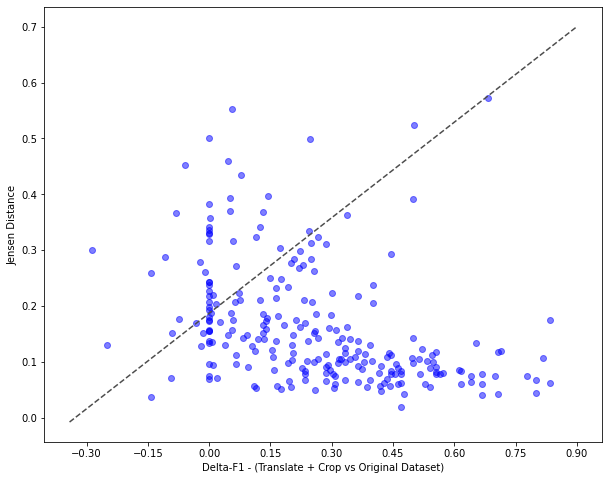

In [286]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=delta_f1_scores,y=jensen_distances,c=['#0000ff'],alpha=0.5,label='aaa') # azul
#ax.legend(title='Titulo',loc="lower right")
plt.yticks(np.arange(0,0.701,0.1))
plt.xticks(np.arange(-0.3,0.901,0.15))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Jensen Distance')
plt.xlabel('Delta-F1 - (Translate + Crop vs Original Dataset)')
plt.show()
# Laplace smoothing with K=4

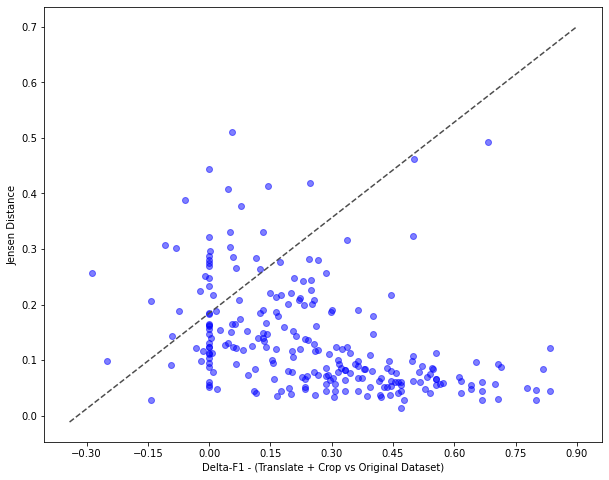

In [292]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=delta_f1_scores,y=jensen_distances,c=['#0000ff'],alpha=0.5,label='aaa') # azul
#ax.legend(title='Titulo',loc="lower right")
plt.yticks(np.arange(0,0.701,0.1))
plt.xticks(np.arange(-0.3,0.901,0.15))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Jensen Distance')
plt.xlabel('Delta-F1 - (Translate + Crop vs Original Dataset)')
plt.show()
# Laplace smoothing with K=8

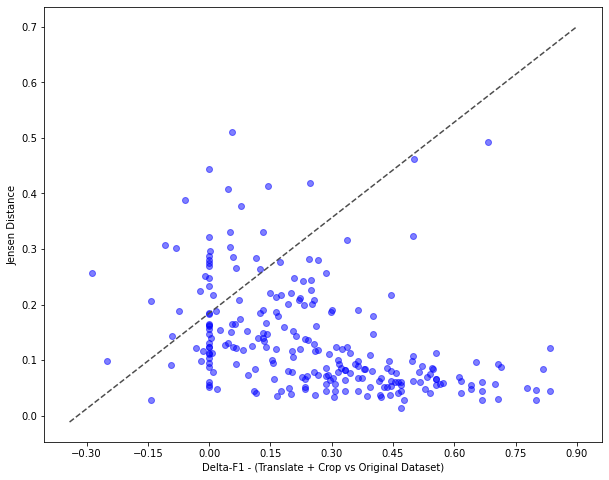

In [294]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=delta_f1_scores,y=jensen_distances,c=['#0000ff'],alpha=0.5,label='aaa') # azul
#ax.legend(title='Titulo',loc="lower right")
plt.yticks(np.arange(0,0.701,0.1))
plt.xticks(np.arange(-0.3,0.901,0.15))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Jensen Distance')
plt.xlabel('Delta-F1 - (Translate + Crop vs Original Dataset)')
plt.show()
# Laplace smoothing with K=16

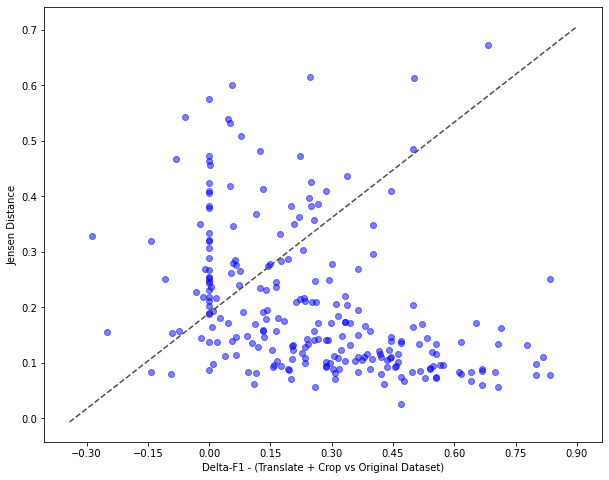

In [261]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=delta_f1_scores,y=jensen_distances,c=['#0000ff'],alpha=0.5,label='aaa') # azul
#ax.legend(title='Titulo',loc="lower right")
plt.yticks(np.arange(0,0.701,0.1))
plt.xticks(np.arange(-0.3,0.901,0.15))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Jensen Distance')
plt.xlabel('Delta-F1 - (Translate + Crop vs Original Dataset)')
plt.show()
# Laplace smoothing with K=1

In [329]:
# Metric (Euclidian Dist.)
# tratamos cada ponto do dataset como se apresentasse 6 coordenadas (tipos de imagem).
l2_distances = [None] * len(label_list) 
for i in range(len(label_list)):  
  l2_distances[i] = math.sqrt(math.pow((train_leaf_class_freq[label_list[i]] - test_leaf_class_freq[label_list[i]]),2) + math.pow((train_sheet_leaf_class_freq[label_list[i]] - test_sheet_leaf_class_freq[label_list[i]]),2) + math.pow((train_flower_class_freq[label_list[i]] - test_flower_class_freq[label_list[i]]),2) + math.pow((train_fruit_class_freq[label_list[i]] - test_fruit_class_freq[label_list[i]]),2) + math.pow((train_entire_class_freq[label_list[i]] - test_entire_class_freq[label_list[i]]),2) + math.pow((train_stem_class_freq[label_list[i]] - test_stem_class_freq[label_list[i]]),2))

# Normalize:
index = np.argmin(l2_distances)
min_val = l2_distances[index] # Min
index = np.argmax(l2_distances)
max_val = l2_distances[index] # Max

normalized_l2_distances = [None] * len(label_list) 
for i in range(len(l2_distances)):
  normalized_l2_distances[i] = (l2_distances[i] - min_val)/(max_val - min_val)

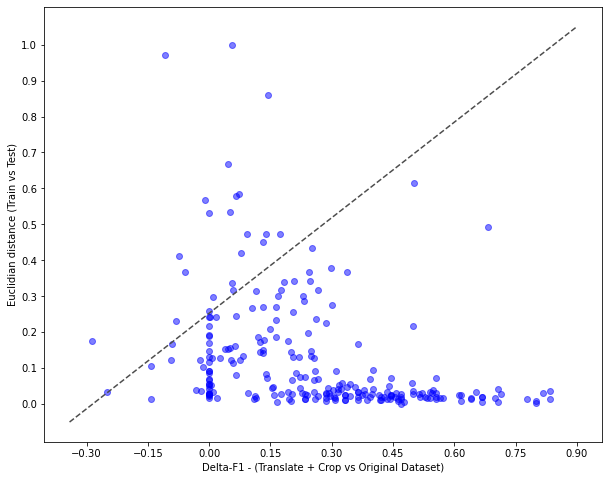

In [332]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=delta_f1_scores,y=normalized_l2_distances,c=['#0000ff'],alpha=0.5,label='aaa') # azul
#ax.legend(title='Titulo',loc="lower right")
plt.yticks(np.arange(0,1.01,0.1))
plt.xticks(np.arange(-0.3,0.901,0.15))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Euclidian distance (Train vs Test)')
plt.xlabel('Delta-F1 - (Translate + Crop vs Original Dataset)')
plt.show()

In [331]:
np.argmin(normalized_l2_distances)

194

In [327]:
normalized_l2_distances[194]

0.0

Text(0.5, 0, 'Normalized L2 distances')

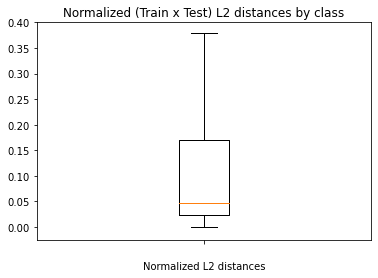

In [340]:
fig1, ax1 = plt.subplots()
plt.yticks(np.arange(0,0.401,0.05))
plt.ylim(-0.025, 0.4)

plt.title('Normalized (Train x Test) L2 distances by class')
test = ax1.boxplot(normalized_l2_distances, showfliers=False)
ax1.set_xticklabels(' ')
ax1.set_xlabel('Normalized L2 distances')

# quartiles:
# 1: 0 - 0.025
# 2: 0.025 - 0.05
# 3: 0.05 - 0.175
# 4: 0.175 - 0.4

Text(0.5, 0, 'Delta F1 Scores')

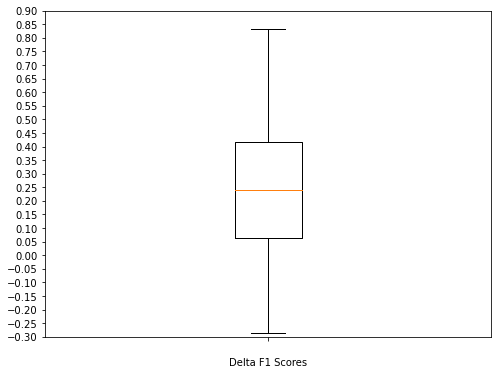

In [314]:
fig1, ax1 = plt.subplots(figsize=(8, 6)) 
plt.yticks(np.arange(-0.3,1.05,0.05))
plt.ylim(-0.3, 0.9)

test = ax1.boxplot(delta_f1_scores, showfliers=False) # Não normalizado
ax1.set_xticklabels(' ')
ax1.set_xlabel('Delta F1 Scores')



In [315]:
len(delta_f1_scores)

241

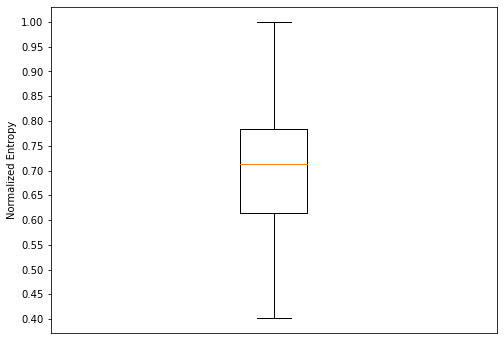

In [106]:
fig1, ax1 = plt.subplots(figsize=(8, 6)) 
plt.yticks(np.arange(0,1.05,0.05))
#plt.ylim(0.35, 1)

test = ax1.boxplot(normalized_train_entropies, showfliers=False) # Não normalizado
ax1.set_xticklabels(' ')
ax1.get_xaxis().set_visible(False)
#ax1.set_xlabel('Normalized Entropy')
ax1.set_ylabel('Normalized Entropy')
plt.savefig('normalized_entropy.jpg')
plt.show()

Text(0.5, 0, 'Original Dataset F1-Micro (Test set)')

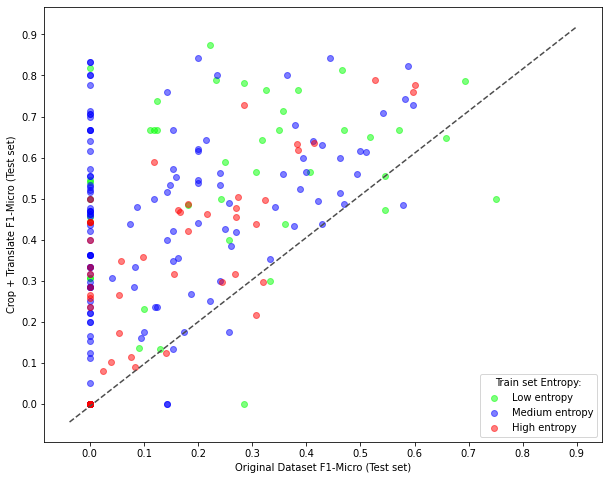

In [26]:
null_labels = [24,80,243,244,245,246,247,248,249] # Classes que não apresentaram imagens de teste

label_list = list(range(250))
for i in range(len(null_labels)):
    label_list.pop(null_labels[i]-i)

def filter_measure(measure, classification_report_dict):
    if measure == 'f1-score':
        f1_by_class = []
        for i in range(250):
          if i not in null_labels:
              i = str(i)
              f1_by_class.append(classification_report_dict[i][measure])
        return f1_by_class    

f1_original_dataset = filter_measure('f1-score', original_dataset_creport)
f1_trans_and_crop_dataset = filter_measure('f1-score', crop_trans_creport)

f1_original_dict = dict(zip(label_list, f1_original_dataset))
f1_trans_and_crop_dict = dict(zip(label_list, f1_trans_and_crop_dataset))
delta_f1_scores_dict = dict(zip(label_list, delta_f1_scores))

low_labels = [] # low entropy
mid_labels = [] # medium entropy
high_labels = [] # high entropy

for i in label_list:
    if normalized_train_entropies_dict[i] > 0.4 and normalized_train_entropies_dict[i] <= 0.6:
        low_labels.append(i)
    elif normalized_train_entropies_dict[i] > 0.6 and normalized_train_entropies_dict[i] <= 0.8:
        mid_labels.append(i)
    elif normalized_train_entropies_dict[i] > 0.8 and normalized_train_entropies_dict[i] <= 1:
        high_labels.append(i)

low_f1_or = []
mid_f1_or = []
high_f1_or = []

low_f1_crop = []
mid_f1_crop = []
high_f1_crop = []

for i in low_labels:
    low_f1_or.append(f1_original_dict[i])
    low_f1_crop.append(f1_trans_and_crop_dict[i])
    
for i in mid_labels:
    mid_f1_or.append(f1_original_dict[i])
    mid_f1_crop.append(f1_trans_and_crop_dict[i])
    
for i in high_labels:
    high_f1_or.append(f1_original_dict[i])
    high_f1_crop.append(f1_trans_and_crop_dict[i])

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_f1_or,y=low_f1_crop,c=['#00ff00'],alpha=0.5,label='Low entropy') # verde
ax.legend()
ax.scatter(x=mid_f1_or,y=mid_f1_crop,c=['#0000ff'],alpha=0.5,label='Medium entropy') # azul
ax.legend()
ax.scatter(x=high_f1_or,y=high_f1_crop,c=['#ff0000'],alpha=0.5,label='High entropy') # vermelho
ax.legend(title='Train set Entropy:',loc="lower right")
plt.yticks(np.arange(0,0.901,0.1))
plt.xticks(np.arange(0,0.901,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Crop + Translate F1-Micro (Test set)')
plt.xlabel('Original Dataset F1-Micro (Test set)')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
#plt.show()


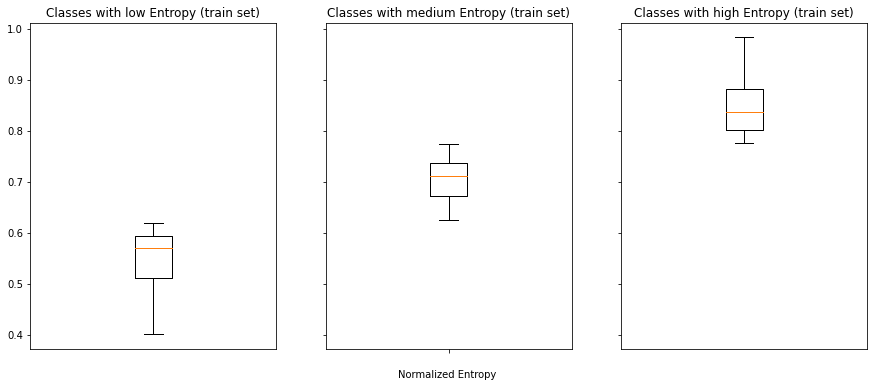

In [201]:
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
#pyplot.yticks(np.arange(0, 0.401,0.025))

low_distances = []
for i in range(len(low_labels)):
  low_distances.append(normalized_train_entropies[low_labels[i]])

medium_distances = []
for i in range(len(mid_labels)):
  medium_distances.append(normalized_train_entropies[mid_labels[i]])

high_distances = []
for i in range(len(high_labels)):
  high_distances.append(normalized_train_entropies[high_labels[i]])

axes[0].set_title('Classes with low Entropy (train set)')
axes[0].boxplot(low_distances)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Entropy (train set)')
axes[1].boxplot(medium_distances)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Normalized Entropy ')

axes[2].set_title('Classes with high Entropy (train set)')
axes[2].boxplot(high_distances, showfliers=False)
axes[2].get_xaxis().set_visible(False)

low_entropy = low_distances
medium_entropy = medium_distances
high_entropy = high_distances

# Para cada categoria apresenta os intervalos:

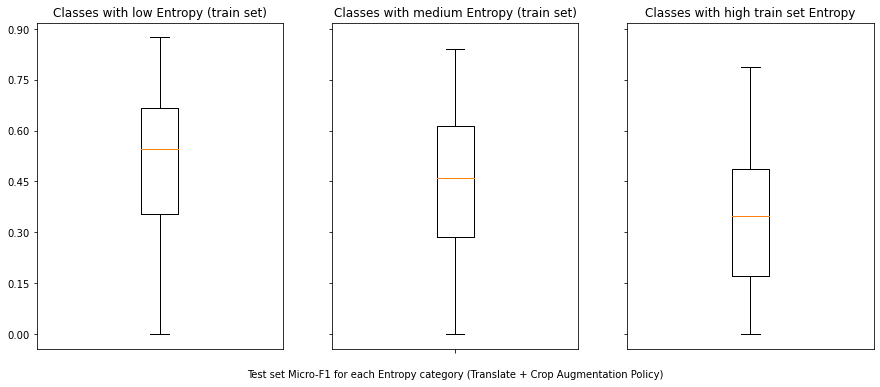

In [192]:
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(0, 1.05,0.15))

axes[0].set_title('Classes with low Entropy (train set)')
axes[0].boxplot(low_f1_crop)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Entropy (train set)')
axes[1].boxplot(mid_f1_crop)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Test set Micro-F1 for each Entropy category (Translate + Crop Augmentation Policy)')

axes[2].set_title('Classes with high train set Entropy')
axes[2].boxplot(high_f1_crop, showfliers=False)
axes[2].get_xaxis().set_visible(False)

# Obs: F1 do melhor método pode não ser a melhor medida pois não captura a informação relativa ao ganho
# de performance proporcionada pela utilização de aumento.

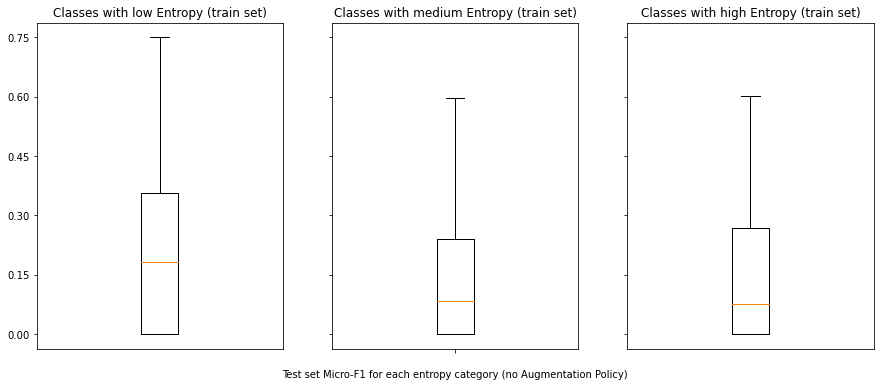

In [193]:
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(0, 0.8,0.15))

axes[0].set_title('Classes with low Entropy (train set)')
axes[0].boxplot(low_f1_or)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Entropy (train set)')
axes[1].boxplot(mid_f1_or)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Test set Micro-F1 for each entropy category (no Augmentation Policy)')

axes[2].set_title('Classes with high Entropy (train set)')
axes[2].boxplot(high_f1_or, showfliers=False)
axes[2].get_xaxis().set_visible(False)

# Noção do desempenho obtido pelo modelo baseline. 

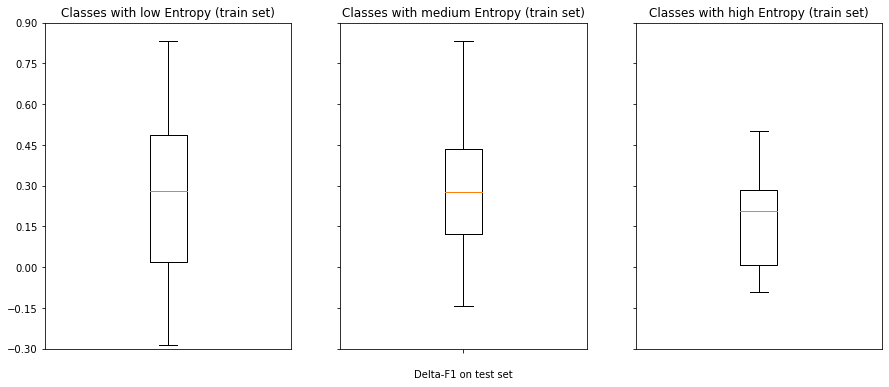

Low Entropy Classes Statistics:
Entropy mean:  0.5443785218742766  Std:  0.05410004747117506
Delta F1 mean:  0.2633086783879529  Std:  0.25697321517770055
--------------------------------------------------------------

Medium Entropy Classes Statistics:
Entropy mean:  0.7120953214924924  Std:  0.04949342112128557
Delta F1 mean:  0.29309327975375277  Std:  0.22415485781240588
--------------------------------------------------------------

High Entropy Classes Statistics:
Entropy mean:  0.8663991580581432  Std:  0.049602369020233225
Delta F1 mean:  0.18213839739842447  Std:  0.15495691985011154
--------------------------------------------------------------


In [110]:
# Merging two analysis above in one metric (delta-f1)
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(-0.3, 1.05,0.15))
plt.ylim(-0.3, 0.9)
low_distances = []
for i in low_labels: # low_labels: labels with low entropy
  low_distances.append(delta_f1_scores_dict[i]) # Append delta-f1 values for classes with low entropy

medium_distances = []
for i in mid_labels:
  medium_distances.append(delta_f1_scores_dict[i])

high_distances = []
for i in high_labels:
  high_distances.append(delta_f1_scores_dict[i])

axes[0].set_title('Classes with low Entropy (train set)')
axes[0].boxplot(low_distances)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Entropy (train set)')
axes[1].boxplot(medium_distances)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Delta-F1 on test set')

axes[2].set_title('Classes with high Entropy (train set)')
axes[2].boxplot(high_distances, showfliers=False)
axes[2].get_xaxis().set_visible(False)
plt.show()
# Permite avaliar a melhoria de desempenho proporcionada pela utilização de aumento para o melhor método,
# agrupado por classes de acordo com os respectivos níveis de desbalanceamento interno.
def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

low_entropy = []
mid_entropy = []
high_entropy = []

for i in low_labels:
    low_entropy.append(normalized_train_entropies_dict[i])
for i in mid_labels:
    mid_entropy.append(normalized_train_entropies_dict[i])
for i in high_labels:
    high_entropy.append(normalized_train_entropies_dict[i])

low_entropy_mean, std = mean_and_std(low_entropy)
low_f1_mean, f1_std = mean_and_std(low_distances)
print("Low Entropy Classes Statistics:")
print("Entropy mean: ", low_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", low_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')
medium_entropy_mean, std = mean_and_std(mid_entropy)
medium_f1_mean, f1_std = mean_and_std(medium_distances)
print("Medium Entropy Classes Statistics:")
print("Entropy mean: ", medium_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", medium_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')

high_entropy_mean, std = mean_and_std(high_entropy)
high_f1_mean, f1_std = mean_and_std(high_distances)
print("High Entropy Classes Statistics:")
print("Entropy mean: ", high_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", high_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')

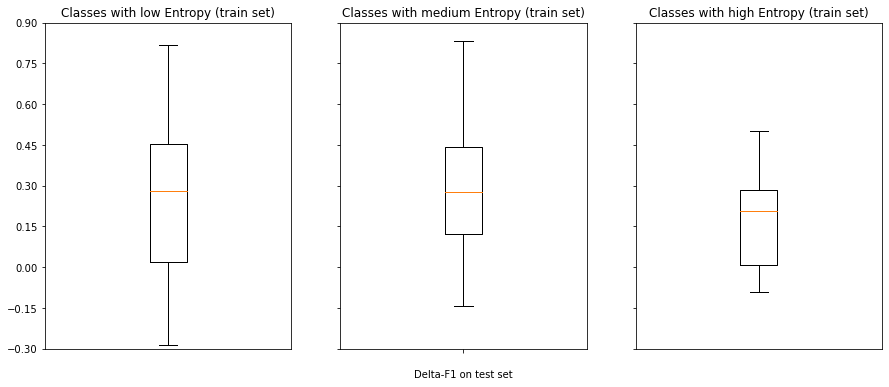

Low Entropy Classes Statistics:
Entropy mean:  0.5390781349394  Std:  0.05319638449663077
Delta F1 mean:  0.2528096400697211  Std:  0.24859406222777794
--------------------------------------------------------------

Medium Entropy Classes Statistics:
Entropy mean:  0.7088600987692459  Std:  0.05206152675236227
Delta F1 mean:  0.29584947185356686  Std:  0.22795408267766917
--------------------------------------------------------------

High Entropy Classes Statistics:
Entropy mean:  0.8663991580581432  Std:  0.049602369020233225
Delta F1 mean:  0.18213839739842447  Std:  0.15495691985011154
--------------------------------------------------------------


In [27]:
# Merging two analysis above in one metric (delta-f1)
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(-0.3, 1.05,0.15))
plt.ylim(-0.3, 0.9)
low_distances = []
for i in low_labels: # low_labels: labels with low entropy
  low_distances.append(delta_f1_scores_dict[i]) # Append delta-f1 values for classes with low entropy

medium_distances = []
for i in mid_labels:
  medium_distances.append(delta_f1_scores_dict[i])

high_distances = []
for i in high_labels:
  high_distances.append(delta_f1_scores_dict[i])

axes[0].set_title('Classes with low Entropy (train set)')
axes[0].boxplot(low_distances)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Entropy (train set)')
axes[1].boxplot(medium_distances)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Delta-F1 on test set')

axes[2].set_title('Classes with high Entropy (train set)')
axes[2].boxplot(high_distances, showfliers=False)
axes[2].get_xaxis().set_visible(False)
plt.show()
# Permite avaliar a melhoria de desempenho proporcionada pela utilização de aumento para o melhor método,
# agrupado por classes de acordo com os respectivos níveis de desbalanceamento interno.
def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

low_entropy = []
mid_entropy = []
high_entropy = []

for i in low_labels:
    low_entropy.append(normalized_train_entropies_dict[i])
for i in mid_labels:
    mid_entropy.append(normalized_train_entropies_dict[i])
for i in high_labels:
    high_entropy.append(normalized_train_entropies_dict[i])

low_entropy_mean, std = mean_and_std(low_entropy)
low_f1_mean, f1_std = mean_and_std(low_distances)
print("Low Entropy Classes Statistics:")
print("Entropy mean: ", low_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", low_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')
medium_entropy_mean, std = mean_and_std(mid_entropy)
medium_f1_mean, f1_std = mean_and_std(medium_distances)
print("Medium Entropy Classes Statistics:")
print("Entropy mean: ", medium_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", medium_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')

high_entropy_mean, std = mean_and_std(high_entropy)
high_f1_mean, f1_std = mean_and_std(high_distances)
print("High Entropy Classes Statistics:")
print("Entropy mean: ", high_entropy_mean, ' Std: ',std)
print("Delta F1 mean: ", high_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')

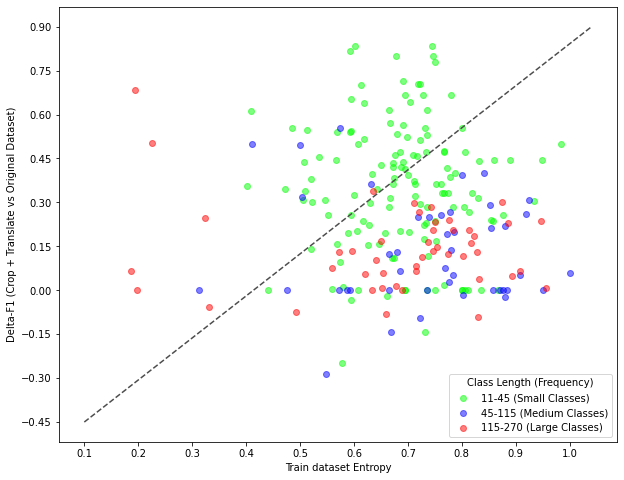

Small-Size Classes Statistics:
Entropy mean:  0.688136339663785  Std:  0.10777310122457763
Delta F1 mean:  0.3528124030266178  Std:  0.22410600265412184
--------------------------------------------------------------

Medium-Size Classes Statistics:
Entropy mean:  0.7339656099449834  Std:  0.15198427130459355
Delta F1 mean:  0.1340863573510873  Std:  0.18002440346547768
--------------------------------------------------------------

Large-Size Classes Statistics:
Entropy mean:  0.6766088243189948  Std:  0.19421941488428732
Delta F1 mean:  0.1400509955421792  Std:  0.14381743003618142
--------------------------------------------------------------


In [90]:
source = 'training_data_distribution.csv'
data_dist = pd.read_csv(source)
data_dist = data_dist.n_samples_by_class

low_labels = []
mid_labels = []
high_labels = []

f1_original_dict = dict(zip(label_list, f1_original_dataset))
f1_trans_and_crop_dict = dict(zip(label_list, f1_trans_and_crop_dataset))
delta_f1_scores_dict = dict(zip(label_list, delta_f1_scores))
normalized_train_entropies_dict = dict(zip(label_list, normalized_train_entropies))

for i in range(0,241):
    if data_dist[label_list[i]] <= 45:
        low_labels.append(label_list[i])
    if data_dist[label_list[i]] > 45 and data_dist[label_list[i]] <= 115:
        mid_labels.append(label_list[i])
    if data_dist[label_list[i]] > 115 and data_dist[label_list[i]] <= 270:
        high_labels.append(label_list[i])

low_deltaf1 = []
mid_deltaf1 = []
high_deltaf1 = []

low_entropy = []
mid_entropy = []
high_entropy = []

for i in low_labels:
    low_deltaf1.append(delta_f1_scores_dict[i])
    low_entropy.append(normalized_train_entropies_dict[i])
for i in mid_labels:
    mid_deltaf1.append(delta_f1_scores_dict[i])
    mid_entropy.append(normalized_train_entropies_dict[i])
for i in high_labels:
    high_deltaf1.append(delta_f1_scores_dict[i])
    high_entropy.append(normalized_train_entropies_dict[i])
    
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_entropy,y=low_deltaf1,c=['#00ff00'],alpha=0.5,label='11-45 (Small Classes)') # verde
ax.legend()
ax.scatter(x=mid_entropy,y=mid_deltaf1,c=['#0000ff'],alpha=0.5,label='45-115 (Medium Classes)') # azul
ax.legend()
ax.scatter(x=high_entropy,y=high_deltaf1,c=['#ff0000'],alpha=0.5,label='115-270 (Large Classes)') # vermelho
ax.legend(title='Class Length (Frequency)',loc="lower right")
plt.yticks(np.arange(-0.45,0.901,0.15))
plt.xticks(np.arange(0.1,1.1,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Delta-F1 (Crop + Translate vs Original Dataset)')
plt.xlabel('Train dataset Entropy')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
plt.show()

def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

small_classes_entropy, std = mean_and_std(low_entropy)
small_classes_delta, delta_std = mean_and_std(low_deltaf1)
print("Small-Size Classes Statistics:")
print("Entropy mean: ", small_classes_entropy, ' Std: ',std)
print("Delta F1 mean: ", small_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')


medium_classes_entropy, std = mean_and_std(mid_entropy)
medium_classes_delta, delta_std = mean_and_std(mid_deltaf1)
print("Medium-Size Classes Statistics:")
print("Entropy mean: ", medium_classes_entropy, ' Std: ',std)
print("Delta F1 mean: ", medium_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')

high_classes_entropy, std = mean_and_std(high_entropy)
high_classes_delta, delta_std = mean_and_std(high_deltaf1)
print("Large-Size Classes Statistics:")
print("Entropy mean: ", high_classes_entropy, ' Std: ',std)
print("Delta F1 mean: ", high_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')

Low Entropy Classes Statistics:
Entropy mean:  0.551007540103998  Std:  0.05568216199321306
Delta F1 mean:  0.2784292201067003  Std:  0.26038964001666753
--------------------------------------------------------------

Medium Entropy Classes Statistics:
Entropy mean:  0.705589551077774  Std:  0.04070795925277958
Delta F1 mean:  0.29045339270707005  Std:  0.2269950860374067
--------------------------------------------------------------

Medium Entropy Classes Statistics:
Entropy mean:  0.8475766079825033  Std:  0.05550319198260344
Delta F1 mean:  0.20206650238361573  Std:  0.16488091072483266
--------------------------------------------------------------


Text(0.5, 0, 'Original Dataset F1 by Class')

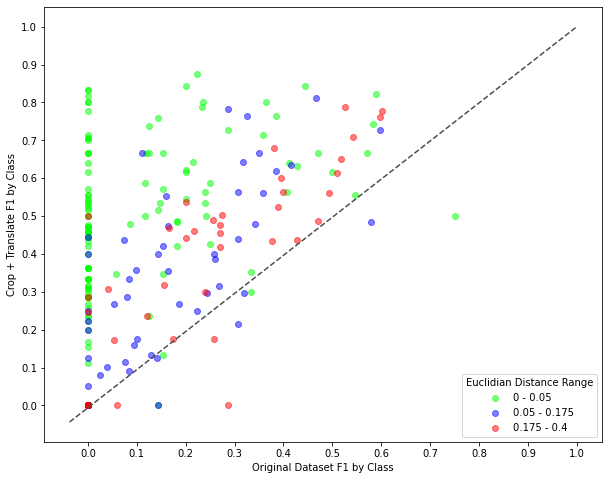

In [341]:
null_labels = [24,80,243,244,245,246,247,248,249] # Classes que não apresentaram imagens de teste

label_list = list(range(250))
for i in range(len(null_labels)):
    label_list.pop(null_labels[i]-i)

def filter_measure(measure, classification_report_dict):
    if measure == 'f1-score':
        f1_by_class = []
        for i in range(250):
          if i not in null_labels:
              i = str(i)
              f1_by_class.append(classification_report_dict[i][measure])
        return f1_by_class    

f1_original_dataset = filter_measure('f1-score', original_dataset_creport)
f1_trans_and_crop_dataset = filter_measure('f1-score', crop_trans_creport)

low_labels = [] # low dissimilarity
mid_labels = [] # medium similarity
high_labels = [] # high dissimilarity

for i in range(len(label_list)):
    if normalized_l2_distances[i] <= 0.05:
        low_labels.append(i)
    elif normalized_l2_distances[i] > 0.05 and normalized_l2_distances[i] <= 0.175:
        mid_labels.append(i)
    elif normalized_l2_distances[i] > 0.175 and normalized_l2_distances[i] <= 0.4:
        high_labels.append(i)

low_f1_or = []
mid_f1_or = []
high_f1_or = []

low_f1_crop = []
mid_f1_crop = []
high_f1_crop = []

for i in range(len(low_labels)):
    low_f1_or.append(f1_original_dataset[low_labels[i]])
    low_f1_crop.append(f1_trans_and_crop_dataset[low_labels[i]])
    
for i in range(len(mid_labels)):
    mid_f1_or.append(f1_original_dataset[mid_labels[i]])
    mid_f1_crop.append(f1_trans_and_crop_dataset[mid_labels[i]])
    
for i in range(len(high_labels)):
    high_f1_or.append(f1_original_dataset[high_labels[i]])
    high_f1_crop.append(f1_trans_and_crop_dataset[high_labels[i]])
    
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_f1_or,y=low_f1_crop,c=['#00ff00'],alpha=0.5,label='0 - 0.05') # verde
ax.legend()
ax.scatter(x=mid_f1_or,y=mid_f1_crop,c=['#0000ff'],alpha=0.5,label='0.05 - 0.175') # azul
ax.legend()
ax.scatter(x=high_f1_or,y=high_f1_crop,c=['#ff0000'],alpha=0.5,label='0.175 - 0.4') # vermelho
ax.legend(title='Euclidian Distance Range',loc="lower right")
plt.yticks(np.arange(0,1.01,0.1))
plt.xticks(np.arange(0,1.01,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Crop + Translate F1 by Class')
plt.xlabel('Original Dataset F1 by Class')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
#plt.show()


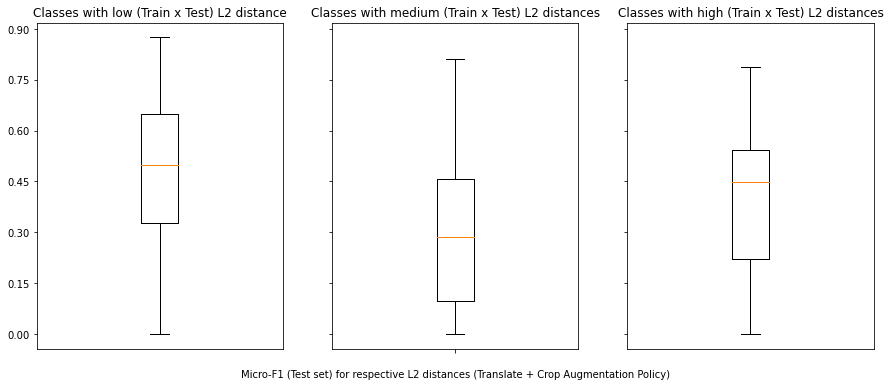

In [172]:
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(0, 1.05,0.15))
#plt.ylim(-0.3, 0.9)

axes[0].set_title('Classes with low (Train x Test) L2 distance')
axes[0].boxplot(low_f1_crop)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium (Train x Test) L2 distances')
axes[1].boxplot(mid_f1_crop)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Micro-F1 (Test set) for respective L2 distances (Translate + Crop Augmentation Policy)')

axes[2].set_title('Classes with high (Train x Test) L2 distances')
axes[2].boxplot(high_f1_crop, showfliers=False)
axes[2].get_xaxis().set_visible(False)

# Obs: F1 do melhor método pode não ser a melhor medida pois não captura a informação relativa ao ganho
# de performance proporcionada pela utilização de aumento.

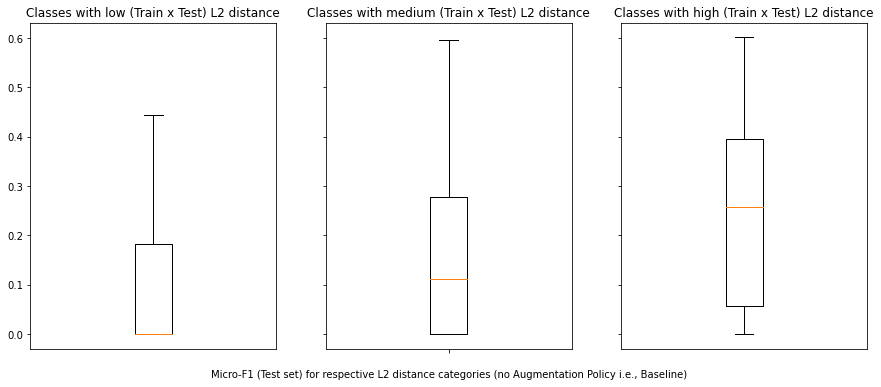

In [173]:
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
#pyplot.yticks(np.arange(0, 0.401,0.025))

axes[0].set_title('Classes with low (Train x Test) L2 distance')
axes[0].boxplot(low_f1_or, showfliers=False)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium (Train x Test) L2 distance')
axes[1].boxplot(mid_f1_or)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Micro-F1 (Test set) for respective L2 distance categories (no Augmentation Policy i.e., Baseline)')

axes[2].set_title('Classes with high (Train x Test) L2 distance')
axes[2].boxplot(high_f1_or, showfliers=False)
axes[2].get_xaxis().set_visible(False)

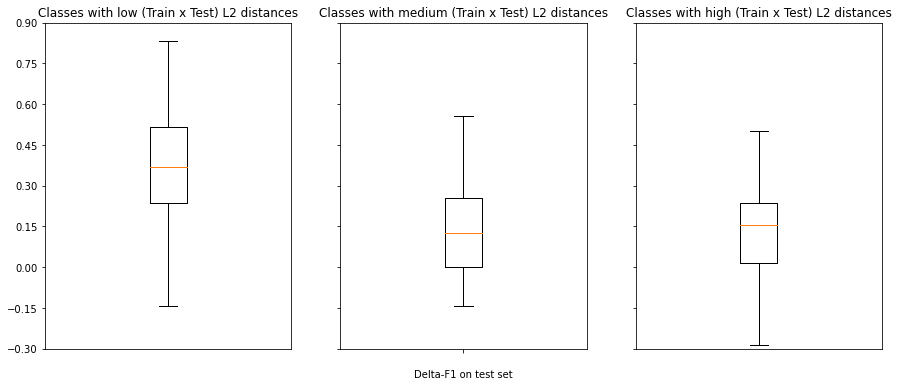

In [215]:
# Merging two analysis above in one metric (delta-f1)
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(-0.3, 1.05,0.15))
plt.ylim(-0.3, 0.9)

low_distances = []
for i in range(len(low_labels)): # low_labels: labels with low entropy
  low_distances.append(delta_f1_scores[low_labels[i]]) # Append delta-f1 values for classes with low entropy

medium_distances = []
for i in range(len(mid_labels)):
  medium_distances.append(delta_f1_scores[mid_labels[i]])

high_distances = []
for i in range(len(high_labels)):
  high_distances.append(delta_f1_scores[high_labels[i]])

axes[0].set_title('Classes with low (Train x Test) L2 distances')
axes[0].boxplot(low_distances, showfliers=False)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium (Train x Test) L2 distances')
axes[1].boxplot(medium_distances)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Delta-F1 on test set')

axes[2].set_title('Classes with high (Train x Test) L2 distances')
axes[2].boxplot(high_distances, showfliers=False)
axes[2].get_xaxis().set_visible(False)

# Obs: demonstrou que o ganho (Delta-F1) proporcionado pelo emprego de aumento
# em relação ao baseline foi mais significativo nas classes em que havia maior similaridade de treino x teste

In [342]:
low_L2 = []
for i in range(len(low_labels)):
  low_L2.append(normalized_l2_distances[low_labels[i]])

medium_L2 = []
for i in range(len(mid_labels)):
  medium_L2.append(normalized_l2_distances[mid_labels[i]])

high_L2 = []
for i in range(len(high_labels)):
  high_L2.append(normalized_l2_distances[high_labels[i]])

def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

low_L2_mean, std = mean_and_std(low_L2)
low_f1_mean, f1_std = mean_and_std(low_distances)
print("Low L2 Distance Classes Statistics:")
print("L2 mean: ", low_L2_mean, ' Std: ',std)
print("Delta F1 mean: ", low_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')

medium_L2_mean, std = mean_and_std(medium_L2)
medium_f1_mean, f1_std = mean_and_std(medium_distances)
print("Medium L2 Distance Classes Statistics:")
print("L2 mean: ", medium_L2_mean, ' Std: ',std)
print("Delta F1 mean: ", medium_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')

high_L2_mean, std = mean_and_std(high_L2)
high_f1_mean, f1_std = mean_and_std(high_distances)
print("High L2 Distance Classes Statistics:")
print("L2 mean: ", high_L2_mean, ' Std: ',std)
print("Delta F1 mean: ", high_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')

Low L2 Distance Classes Statistics:
L2 mean:  0.0241455353205083  Std:  0.01085916926953678
Delta F1 mean:  0.36724640216387455  Std:  0.22276341848137865
--------------------------------------------------------------

Medium L2 Distance Classes Statistics:
L2 mean:  0.1076031924027369  Std:  0.03778554810413492
Delta F1 mean:  0.14613047318041725  Std:  0.15870817951325825
--------------------------------------------------------------

High L2 Distance Classes Statistics:
L2 mean:  0.2688420021726303  Std:  0.05885696518503419
Delta F1 mean:  0.13531779936126992  Std:  0.1392534934794536
--------------------------------------------------------------


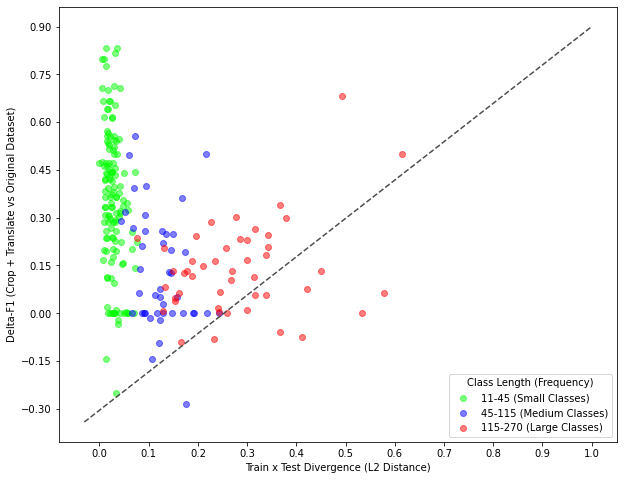

Small-Size Classes Statistics:
L2 mean:  0.027450232552368156  Std:  0.015321400334072678
Delta F1 mean:  0.3528124030266178  Std:  0.22410600265412184
--------------------------------------------------------------

Medium-Size Classes Statistics:
L2 mean:  0.1237603440046766  Std:  0.04611354792530778
Delta F1 mean:  0.1340863573510873  Std:  0.18002440346547768
--------------------------------------------------------------

Large-Size Classes Statistics:
L2 mean:  0.2819322481295332  Std:  0.11924693464772808
Delta F1 mean:  0.1400509955421792  Std:  0.14381743003618142
--------------------------------------------------------------


In [350]:
source = 'training_data_distribution.csv'
data_dist = pd.read_csv(source)
data_dist = data_dist.n_samples_by_class

low_labels = []
mid_labels = []
high_labels = []

f1_original_dict = dict(zip(label_list, f1_original_dataset))
f1_trans_and_crop_dict = dict(zip(label_list, f1_trans_and_crop_dataset))
delta_f1_scores_dict = dict(zip(label_list, delta_f1_scores))
normalized_l2_distances_dict = dict(zip(label_list, normalized_l2_distances))

for i in range(0,241): # Categoriza as classes por tamanho
    if data_dist[label_list[i]] <= 45:
        low_labels.append(label_list[i])
    if data_dist[label_list[i]] > 45 and data_dist[label_list[i]] <= 115:
        mid_labels.append(label_list[i])
    if data_dist[label_list[i]] > 115 and data_dist[label_list[i]] <= 270:
        high_labels.append(label_list[i])

low_deltaf1 = []
mid_deltaf1 = []
high_deltaf1 = []

low_l2 = []
mid_l2 = []
high_l2 = []

for i in low_labels: # Agrupa os valores de Delta F1 e L2 distances para classes pequenas médias e grandes.
    low_deltaf1.append(delta_f1_scores_dict[i])
    low_l2.append(normalized_l2_distances_dict[i])
for i in mid_labels:
    mid_deltaf1.append(delta_f1_scores_dict[i])
    mid_l2.append(normalized_l2_distances_dict[i])
for i in high_labels:
    high_deltaf1.append(delta_f1_scores_dict[i])
    high_l2.append(normalized_l2_distances_dict[i])
    
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_l2,y=low_deltaf1,c=['#00ff00'],alpha=0.5,label='11-45 (Small Classes)') # verde
ax.legend()
ax.scatter(x=mid_l2,y=mid_deltaf1,c=['#0000ff'],alpha=0.5,label='45-115 (Medium Classes)') # azul
ax.legend()
ax.scatter(x=high_l2,y=high_deltaf1,c=['#ff0000'],alpha=0.5,label='115-270 (Large Classes)') # vermelho
ax.legend(title='Class Length (Frequency)',loc="lower right")
plt.yticks(np.arange(-0.30,0.901,0.15))
plt.xticks(np.arange(0,1.1,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Delta-F1 (Crop + Translate vs Original Dataset)')
plt.xlabel('Train x Test Divergence (L2 Distance)')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
plt.show()

def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

small_classes_l2, std = mean_and_std(low_l2)
small_classes_delta, delta_std = mean_and_std(low_deltaf1)
print("Small-Size Classes Statistics:")
print("L2 mean: ", small_classes_l2, ' Std: ',std)
print("Delta F1 mean: ", small_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')

medium_classes_l2, std = mean_and_std(mid_l2)
medium_classes_delta, delta_std = mean_and_std(mid_deltaf1)
print("Medium-Size Classes Statistics:")
print("L2 mean: ", medium_classes_l2, ' Std: ',std)
print("Delta F1 mean: ", medium_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')

high_classes_l2, std = mean_and_std(high_l2)
high_classes_delta, delta_std = mean_and_std(high_deltaf1)
print("Large-Size Classes Statistics:")
print("L2 mean: ", high_classes_l2, ' Std: ',std)
print("Delta F1 mean: ", high_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')

In [34]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    #array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

Text(0.5, 0, 'Gini index')

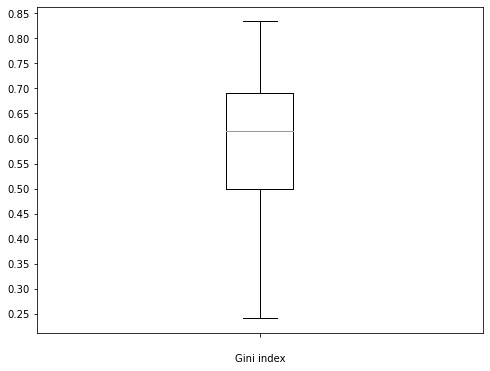

In [37]:
fig1, ax1 = plt.subplots(figsize=(8, 6)) 
plt.yticks(np.arange(0,1.05,0.05))
#plt.ylim(0.35, 1)

test = ax1.boxplot(gini_coefficient, showfliers=False) # Não normalizado
ax1.set_xticklabels(' ')
ax1.set_xlabel('Gini index')


Text(0.5, 0, 'Original Dataset F1-Micro (Test set)')

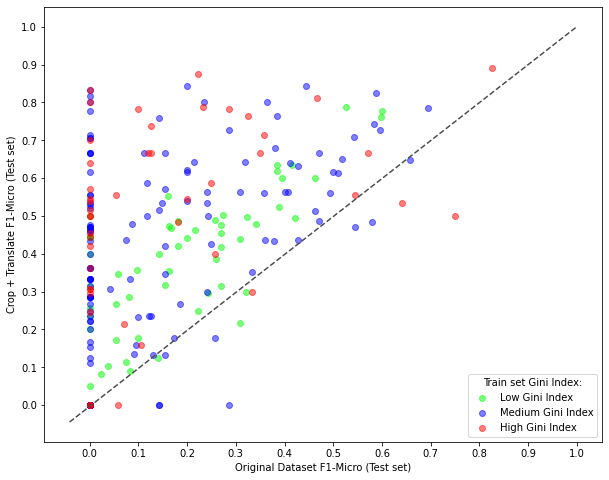

In [56]:
null_labels = [24,80,243,244,245,246,247,248,249] # Classes que não apresentaram imagens de teste

label_list = list(range(250))
for i in range(len(null_labels)):
    label_list.pop(null_labels[i]-i)

def filter_measure(measure, classification_report_dict):
    if measure == 'f1-score':
        f1_by_class = []
        for i in range(250):
          if i not in null_labels:
              i = str(i)
              f1_by_class.append(classification_report_dict[i][measure])
        return f1_by_class    

f1_original_dataset = filter_measure('f1-score', original_dataset_creport)
f1_trans_and_crop_dataset = filter_measure('f1-score', crop_trans_creport)

f1_original_dict = dict(zip(label_list, f1_original_dataset))
f1_trans_and_crop_dict = dict(zip(label_list, f1_trans_and_crop_dataset))
delta_f1_scores_dict = dict(zip(label_list, delta_f1_scores))


low_labels = [] # low gini
mid_labels = [] # medium gini
high_labels = [] # high gini

for i in (label_list):
    if train_dataset_gini_dict[i] > 0.15 and train_dataset_gini_dict[i] <= 0.5125:
        low_labels.append(i)
    elif train_dataset_gini_dict[i] > 0.5125 and train_dataset_gini_dict[i] <= 0.7:
        mid_labels.append(i)
    elif train_dataset_gini_dict[i] > 0.7 and train_dataset_gini_dict[i] <= 0.85:
        high_labels.append(i)

low_f1_or = []
mid_f1_or = []
high_f1_or = []

low_f1_crop = []
mid_f1_crop = []
high_f1_crop = []

for i in low_labels:
    low_f1_or.append(f1_original_dict[i])
    low_f1_crop.append(f1_trans_and_crop_dict[i])
    
for i in mid_labels:
    mid_f1_or.append(f1_original_dict[i])
    mid_f1_crop.append(f1_trans_and_crop_dict[i])
    
for i in high_labels:
    high_f1_or.append(f1_original_dict[i])
    high_f1_crop.append(f1_trans_and_crop_dict[i])

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_f1_or,y=low_f1_crop,c=['#00ff00'],alpha=0.5,label='Low Gini Index') # verde
ax.legend()
ax.scatter(x=mid_f1_or,y=mid_f1_crop,c=['#0000ff'],alpha=0.5,label='Medium Gini Index') # azul
ax.legend()
ax.scatter(x=high_f1_or,y=high_f1_crop,c=['#ff0000'],alpha=0.5,label='High Gini Index') # vermelho
ax.legend(title='Train set Gini Index:',loc="lower right")
plt.yticks(np.arange(0,1.01,0.1))
plt.xticks(np.arange(0,1.01,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Crop + Translate F1-Micro (Test set)')
plt.xlabel('Original Dataset F1-Micro (Test set)')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
#plt.show()


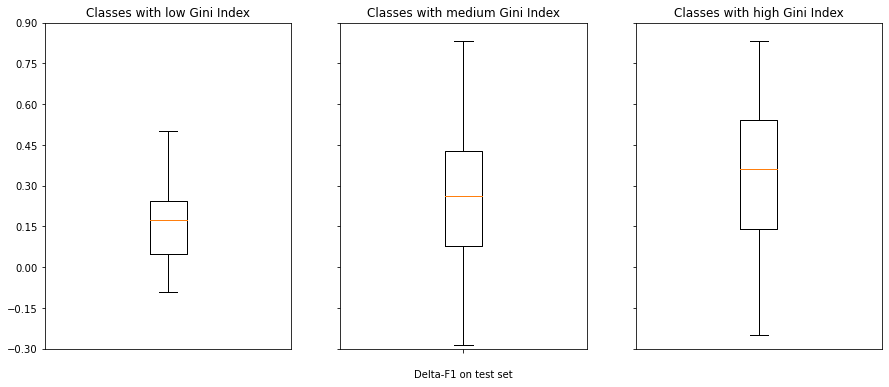

Low Gini Classes Statistics:
Gini mean:  0.4137912592656927  Std:  0.07991149049184454
Delta F1 mean:  0.16456151344844372  Std:  0.1355133565316852
--------------------------------------------------------------

Medium Gini Classes Statistics:
Gini mean:  0.6220941425860375  Std:  0.054006526717999125
Delta F1 mean:  0.2698459761841784  Std:  0.23189547823283005
--------------------------------------------------------------

High Gini Classes Statistics:
Gini mean:  0.7504323894666618  Std:  0.03289604233156638
Delta F1 mean:  0.34967706423588174  Std:  0.2558762913677065
--------------------------------------------------------------


In [60]:
# Merging two analysis above in one metric (delta-f1)
fig, axes = pyplot.subplots(ncols=3, figsize=(15, 6), sharey=True)
pyplot.yticks(np.arange(-0.3, 1.05,0.15))
plt.ylim(-0.3, 0.9)

low_distances = []
for i in low_labels: # low_labels: labels with low gini index
  low_distances.append(delta_f1_scores_dict[i]) # Append delta-f1 values for classes with low entropy

medium_distances = []
for i in mid_labels:
  medium_distances.append(delta_f1_scores_dict[i])

high_distances = []
for i in high_labels:
  high_distances.append(delta_f1_scores_dict[i])

axes[0].set_title('Classes with low Gini Index')
axes[0].boxplot(low_distances, showfliers=False)
axes[0].get_xaxis().set_visible(False)

axes[1].set_title('Classes with medium Gini Index')
axes[1].boxplot(medium_distances)
#axes[1].get_xaxis().set_visible(False)
axes[1].set_xticklabels(' ')
axes[1].set_xlabel('Delta-F1 on test set')

axes[2].set_title('Classes with high Gini Index')
axes[2].boxplot(high_distances, showfliers=False)
axes[2].get_xaxis().set_visible(False)
plt.show()
def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

low_deltaf1 = []
mid_deltaf1 = []
high_deltaf1 = []

low_gini = []
mid_gini = []
high_gini = []

for i in low_labels: # Agrupa os valores de Delta F1 e L2 distances para classes pequenas médias e grandes.
    low_deltaf1.append(delta_f1_scores_dict[i])
    low_gini.append(train_dataset_gini_dict[i])
for i in mid_labels:
    mid_deltaf1.append(delta_f1_scores_dict[i])
    mid_gini.append(train_dataset_gini_dict[i])
for i in high_labels:
    high_deltaf1.append(delta_f1_scores_dict[i])
    high_gini.append(train_dataset_gini_dict[i])
    

low_gini_mean, std = mean_and_std(low_gini)
low_f1_mean, f1_std = mean_and_std(low_deltaf1)
print("Low Gini Classes Statistics:")
print("Gini mean: ", low_gini_mean, ' Std: ',std)
print("Delta F1 mean: ", low_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')
medium_gini_mean, std = mean_and_std(mid_gini)
medium_f1_mean, f1_std = mean_and_std(mid_deltaf1)
print("Medium Gini Classes Statistics:")
print("Gini mean: ", medium_gini_mean, ' Std: ',std)
print("Delta F1 mean: ", medium_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')
print('')

high_gini_mean, std = mean_and_std(high_gini)
high_f1_mean, f1_std = mean_and_std(high_deltaf1)
print("High Gini Classes Statistics:")
print("Gini mean: ", high_gini_mean, ' Std: ',std)
print("Delta F1 mean: ", high_f1_mean, ' Std: ', f1_std)
print('--------------------------------------------------------------')

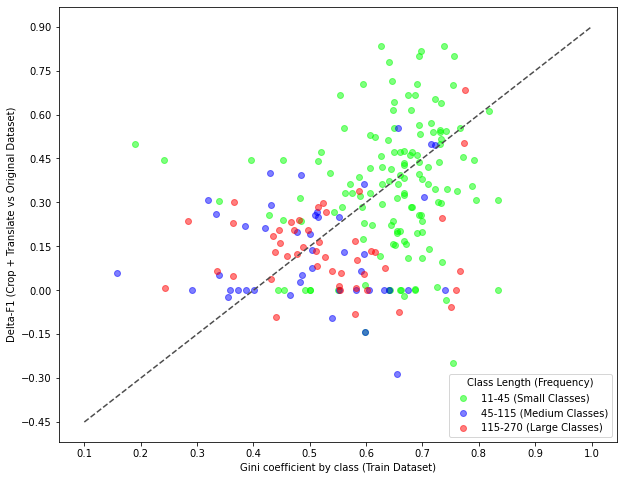

Small-Size Classes Statistics:
Gini mean:  0.64463779245086  Std:  0.10279394341476672
Delta F1 mean:  0.3528124030266178  Std:  0.22410600265412184
--------------------------------------------------------------

Medium-Size Classes Statistics:
Gini mean:  0.5074600468014447  Std:  0.12897638289268076
Delta F1 mean:  0.1340863573510873  Std:  0.18002440346547768
--------------------------------------------------------------

Large-Size Classes Statistics:
Gini mean:  0.5310814730012212  Std:  0.12377290806030149
Delta F1 mean:  0.1400509955421792  Std:  0.14381743003618142
--------------------------------------------------------------


In [35]:
source = 'training_data_distribution.csv'
data_dist = pd.read_csv(source)
data_dist = data_dist.n_samples_by_class

low_labels = []
mid_labels = []
high_labels = []

f1_original_dict = dict(zip(label_list, f1_original_dataset))
f1_trans_and_crop_dict = dict(zip(label_list, f1_trans_and_crop_dataset))
delta_f1_scores_dict = dict(zip(label_list, delta_f1_scores))

gini_coefficient = [] # Compute gini coefficient for every class (train)
for i in range(0,241):
  arr = np.array([train_leaf_class_freq[label_list[i]],
                train_sheet_leaf_class_freq[label_list[i]], 
                train_flower_class_freq[label_list[i]],
                train_fruit_class_freq[label_list[i]],
                train_entire_class_freq[label_list[i]],
                train_stem_class_freq[label_list[i]]], dtype=np.float32)
  gini_coefficient.append(gini(arr))

train_dataset_gini_dict = dict(zip(label_list,gini_coefficient))

for i in range(0,241):
    if data_dist[label_list[i]] <= 45:
        low_labels.append(label_list[i])
    if data_dist[label_list[i]] > 45 and data_dist[label_list[i]] <= 115:
        mid_labels.append(label_list[i])
    if data_dist[label_list[i]] > 115 and data_dist[label_list[i]] <= 270:
        high_labels.append(label_list[i])

low_deltaf1 = []
mid_deltaf1 = []
high_deltaf1 = []

low_gini = []
mid_gini = []
high_gini = []

for i in low_labels:
    low_deltaf1.append(delta_f1_scores_dict[i])
    low_gini.append(train_dataset_gini_dict[i])
for i in mid_labels:
    mid_deltaf1.append(delta_f1_scores_dict[i])
    mid_gini.append(train_dataset_gini_dict[i])
for i in high_labels:
    high_deltaf1.append(delta_f1_scores_dict[i])
    high_gini.append(train_dataset_gini_dict[i])
    
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=low_gini,y=low_deltaf1,c=['#00ff00'],alpha=0.5,label='11-45 (Small Classes)') # verde
ax.legend()
ax.scatter(x=mid_gini,y=mid_deltaf1,c=['#0000ff'],alpha=0.5,label='45-115 (Medium Classes)') # azul
ax.legend()
ax.scatter(x=high_gini,y=high_deltaf1,c=['#ff0000'],alpha=0.5,label='115-270 (Large Classes)') # vermelho
ax.legend(title='Class Length (Frequency)',loc="lower right")
plt.yticks(np.arange(-0.45,0.901,0.15))
plt.xticks(np.arange(0.1,1.1,0.1))
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
plt.ylabel('Delta-F1 (Crop + Translate vs Original Dataset)')
plt.xlabel('Gini coefficient by class (Train Dataset)')
#plt.title('F1 x F1: Crop + Translate vs Original Dataset')
#plt.savefig('/Users/lucianoaraujo/Desktop/f1xf1.jpg')
plt.show()

def mean_and_std(arr):
  return np.mean(arr), np.std(arr)

small_classes_gini, std = mean_and_std(low_gini)
small_classes_delta, delta_std = mean_and_std(low_deltaf1)
print("Small-Size Classes Statistics:")
print("Gini mean: ", small_classes_gini, ' Std: ',std)
print("Delta F1 mean: ", small_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')

medium_classes_gini, std = mean_and_std(mid_gini)
medium_classes_delta, delta_std = mean_and_std(mid_deltaf1)
print("Medium-Size Classes Statistics:")
print("Gini mean: ", medium_classes_gini, ' Std: ',std)
print("Delta F1 mean: ", medium_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')
print('')

high_classes_gini, std = mean_and_std(high_gini)
high_classes_delta, delta_std = mean_and_std(high_deltaf1)
print("Large-Size Classes Statistics:")
print("Gini mean: ", high_classes_gini, ' Std: ',std)
print("Delta F1 mean: ", high_classes_delta, ' Std: ', delta_std)
print('--------------------------------------------------------------')